## DPT Clustering with K-Means
by : Arsyadana Estu Aziz (121140068)

A Kerja Praktik project on making a clustering on rekapitulasi daftar pemilih Pilkada 2024

## Source of Data
- Rekapitulasi daftar pemilih as the main source of data
- Opsional data for each kecamatan from BPS (Badan Pusat Statistik)

In [1]:
## Install the Necessary Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Open and read the csv data
file_path = "dataset-rekapitulasi-dpt-kecamatan.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()

,Sub-Region,Male Voters,Female Voters,Total Voters,Voter Gender Ratio,Total Population,Population Growth Rate (%),Population Density,Population Gender Ratio,Eligible Voter Ratio
0,KEDATON,19196,19657,38853,97.65,52400,-0.17,13896,100.900,74.146947
1,SUKARAME,23913,24623,48536,97.12,67100,0.65,6148,102.200,72.333830
2,TANJUNG KARANG BARAT,22329,22631,44960,98.67,63200,0.72,5476,101.900,71.139241
3,PANJANG,26859,26298,53157,102.13,74900,0.23,5488,1.041,70.970628
4,TANJUNG KARANG TIMUR,14017,14236,28253,98.46,38500,-0.37,18619,104.100,73.384416


## Analysis : Attribute Data
For this case, we're going to use the attribute data such as the `Eligible Voters Ratio`, `Voter Gender Ratio`, `Population Density`, and the `Population Growth Rate` since that data is already being processed and can be used for further analysis.

For this clustering, there will be many variation, such as to visualize these 4 attribute from side by side perspective, using 3D dimension view and using PCA (Principal Component Analysis).

### Side by Side Attribute Analysis
This section cover the code for comparing 4 attribute code.

C:\Users\ACER\AppData\Local\Temp\ipykernel_10608\1663143485.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = clusters


229
221


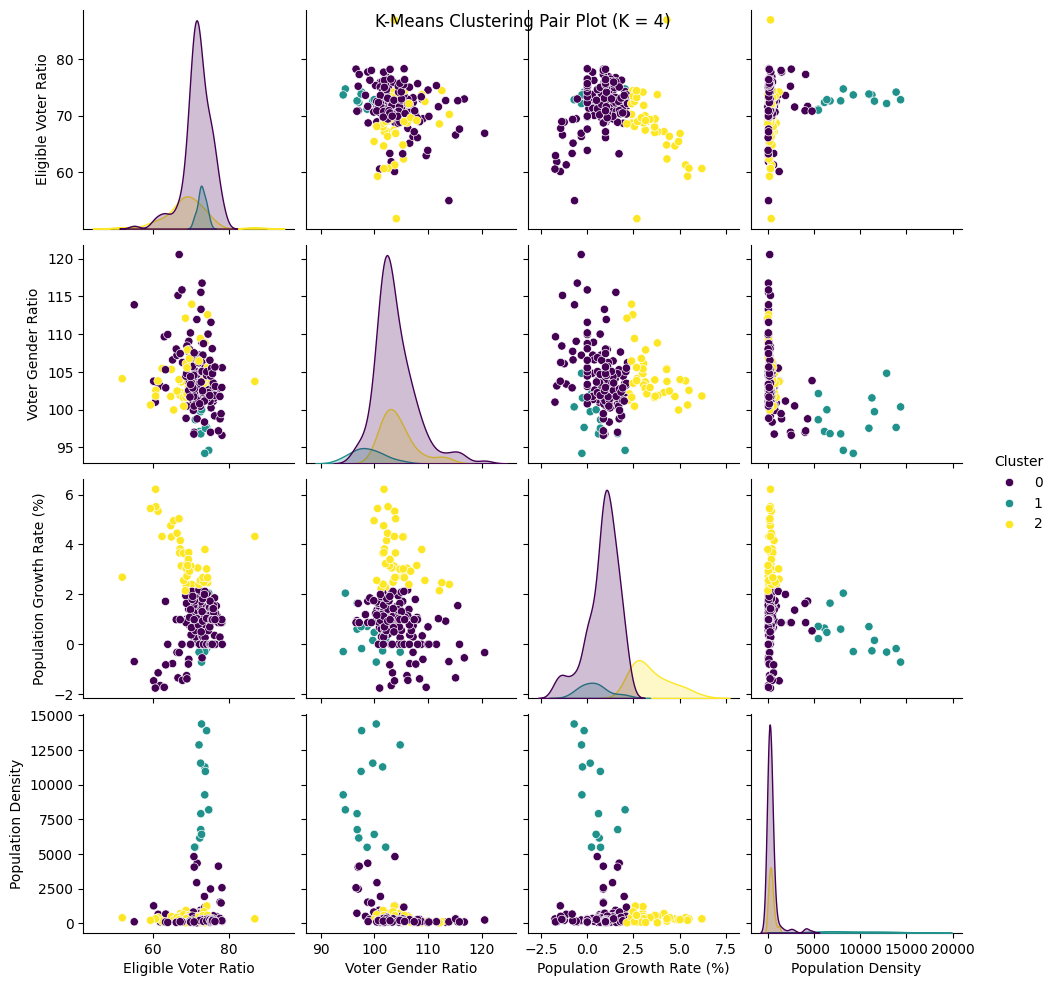

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.stats import zscore

# Select relevant columns for clustering
data = df[['Eligible Voter Ratio', 'Voter Gender Ratio', 'Population Growth Rate (%)', 'Population Density']]

## Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

## Apply K means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=17)
clusters = kmeans.fit_predict(data_scaled)

## Add clusters label to the dataset
data['Cluster'] = clusters
print(len(data))

# Compute the distance of each point to its assigned cluster centroid
distances_to_centroids = kmeans.transform(data_scaled)
distances = np.array([distances_to_centroids[i, clusters[i]] for i in range(len(data_scaled))])

# Calculate the Z-scores of the distances
z_scores = zscore(distances)

# Set a threshold for outlier detection
threshold = 2
outliers = np.abs(z_scores) > threshold

# Remove outliers from the data
data_filtered = data[~outliers]
print(len(data_filtered))

## Create a pair plot of filtered data
sns.pairplot(data_filtered, hue="Cluster", vars=['Eligible Voter Ratio', 'Voter Gender Ratio', 'Population Growth Rate (%)', 'Population Density'], palette="viridis", markers="o")
plt.suptitle("K-Means Clustering Pair Plot (K = 4)")
plt.show()


### 3d Views Analysis
This section uses 3d graph to look the correlation between each of the data attribute:

1. Define the Appropriate Cluster with Elbow Method

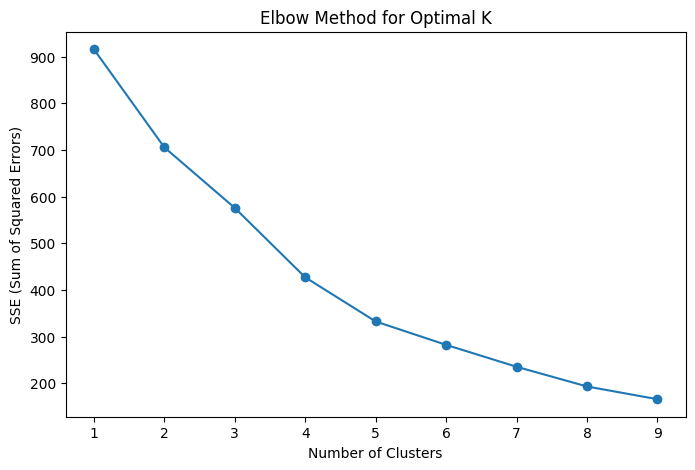

In [4]:
# Select the features for clustering
data = df[['Eligible Voter Ratio', 'Population Growth Rate (%)', 'Population Density', 'Voter Gender Ratio']]

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform KMeans can calculate SSE (Sum Squared Error) for K values
sse = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=17)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot Elbow Method
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(K_range, sse, marker='o')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('SSE (Sum of Squared Errors)')
ax.set_title('Elbow Method for Optimal K')
plt.show()


2. Working on the Clustering and display with 3d visualization

C:\Users\ACER\AppData\Local\Temp\ipykernel_10608\1995179673.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = clusters


229
221


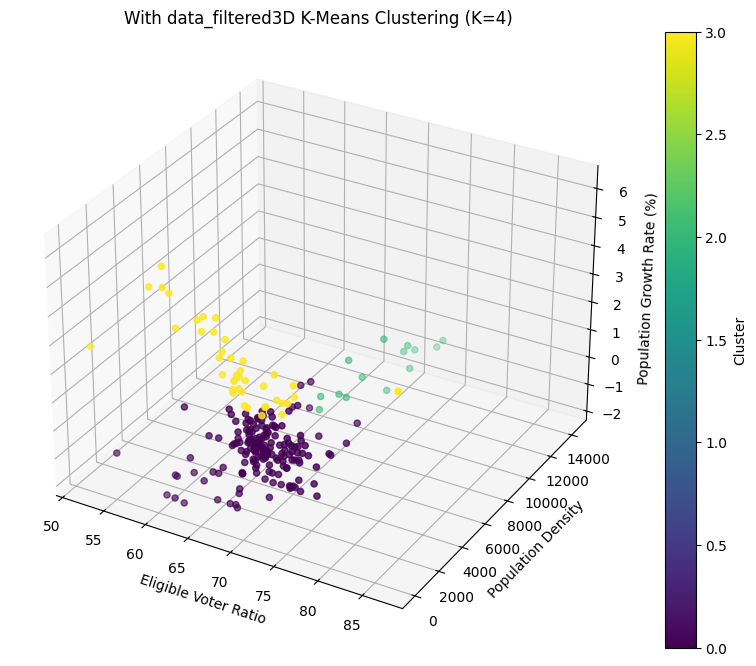

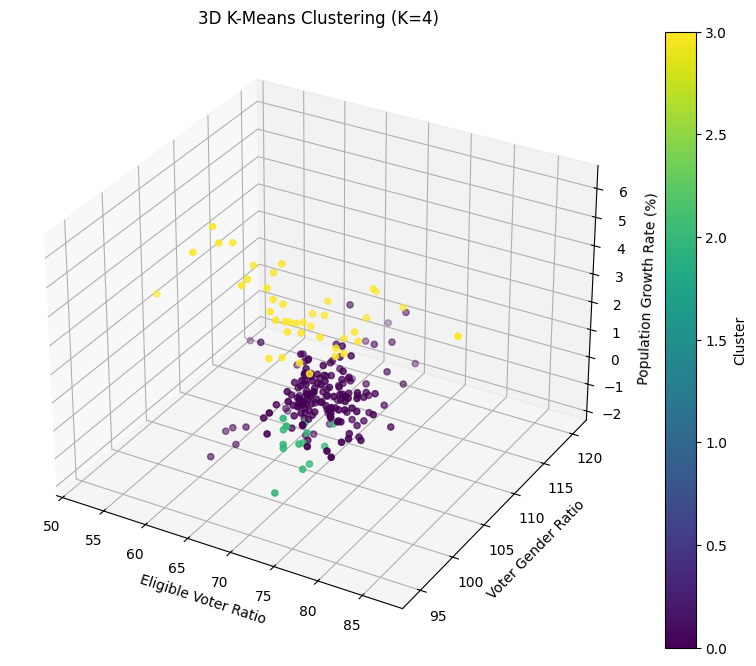

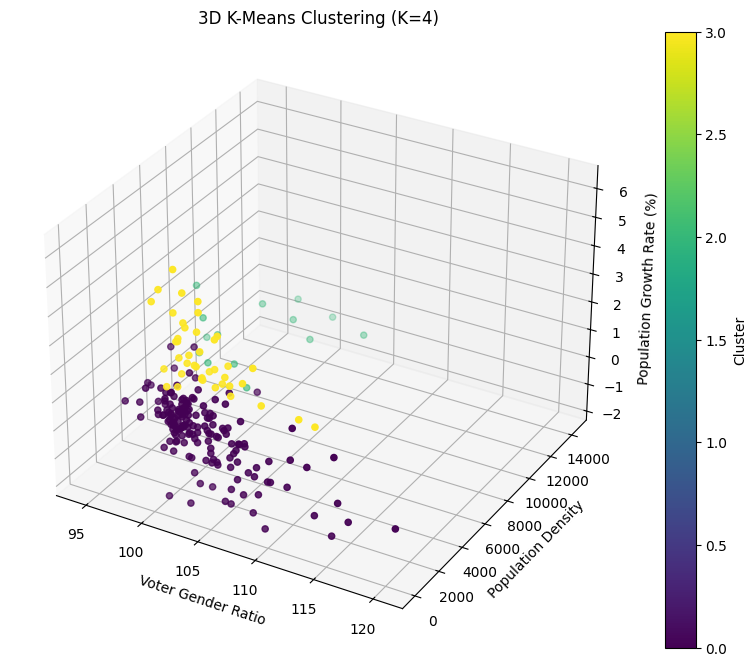

In [5]:
# Apply KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the dataset
data['Cluster'] = clusters
print(len(data))

# Compute the distance of each point to its assigned cluster centroid
distances_to_centroids = kmeans.transform(data_scaled)
distances = np.array([distances_to_centroids[i, clusters[i]] for i in range(len(data_scaled))])

# Calculate the Z-scores of the distances
z_scores = zscore(distances)

# Set a threshold for outlier detection
threshold = 2
outliers = np.abs(z_scores) > threshold

# Remove outliers from the data
data_filtered = data[~outliers]
print(len(data_filtered))

# Create a 3D scatter plot with the first 3 attributes, and using Population Density for marker size
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with X, Y, Z axes, using color for cluster differentiation
sc = ax.scatter(data_filtered['Eligible Voter Ratio'],
                data_filtered['Population Density'],
                data_filtered['Population Growth Rate (%)'],
                c=data_filtered['Cluster'], cmap='viridis')

# Labels
ax.set_xlabel('Eligible Voter Ratio')
ax.set_ylabel('Population Density')
ax.set_zlabel('Population Growth Rate (%)')

# Adding color bar to show cluster assignment
plt.colorbar(sc, label='Cluster')

plt.title('With data_filtered3D K-Means Clustering (K=4)')

# Create a 3D scatter plot with the first 3 attributes, and using Population Density for marker size
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with X, Y, Z axes, using color for cluster differentiation
sc = ax.scatter(data_filtered['Eligible Voter Ratio'],
                data_filtered['Voter Gender Ratio'],
                data_filtered['Population Growth Rate (%)'],
                c=data_filtered['Cluster'], cmap='viridis')

# Labels
ax.set_xlabel('Eligible Voter Ratio')
ax.set_ylabel('Voter Gender Ratio')
ax.set_zlabel('Population Growth Rate (%)')

# Adding color bar to show cluster assignment
plt.colorbar(sc, label='Cluster')

plt.title('3D K-Means Clustering (K=4)')

# Create a 3D scatter plot with the first 3 attributes, and using Population Density for marker size
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with X, Y, Z axes, using color for cluster differentiation
sc = ax.scatter(data_filtered['Voter Gender Ratio'],
                data_filtered['Population Density'],
                data_filtered['Population Growth Rate (%)'],
                c=data_filtered['Cluster'], cmap='viridis')

# Labels
ax.set_xlabel('Voter Gender Ratio')
ax.set_ylabel('Population Density')
ax.set_zlabel('Population Growth Rate (%)')

# Adding color bar to show cluster assignment
plt.colorbar(sc, label='Cluster')

plt.title('3D K-Means Clustering (K=4)')

plt.show()


### Visualisasi Using PCA
This section cover the use case of PCA to show case the how 4 attribute visualize.

C:\Users\ACER\AppData\Local\Temp\ipykernel_10608\2485154729.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = clusters
C:\Users\ACER\AppData\Local\Temp\ipykernel_10608\2485154729.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Z-Scores'] = np.nan  # Initialize a column for Z-scores
C:\Users\ACER\AppData\Local\Temp\ipykernel_10608\2485154729.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

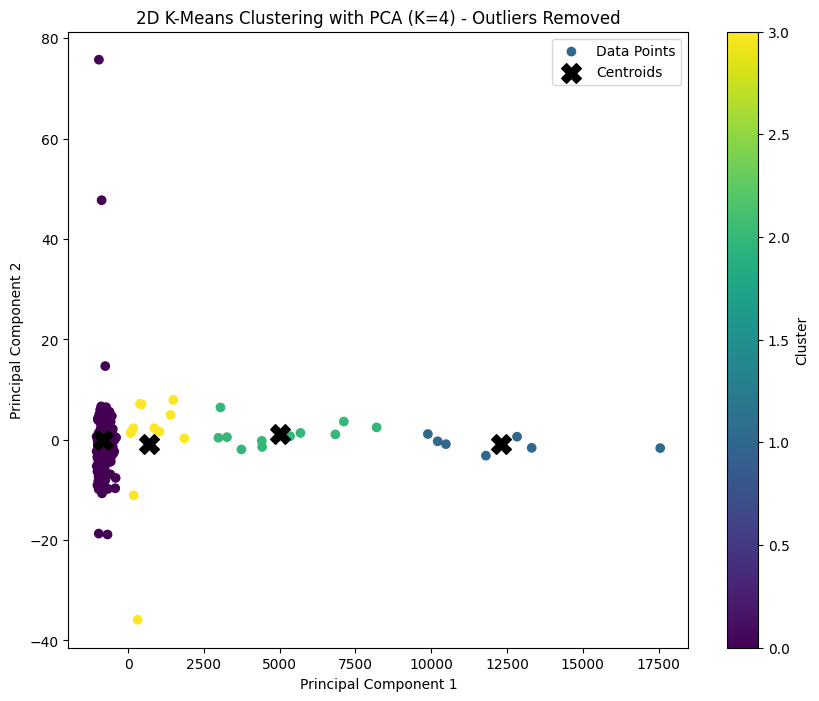

In [6]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import zscore

X = data[['Eligible Voter Ratio', 'Voter Gender Ratio', 'Population Growth Rate (%)', 'Population Density']]

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply KMeans with 4 clusters on the original 4D data
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Calculate Z-scores within each cluster
data['Z-Scores'] = np.nan  # Initialize a column for Z-scores
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    for col in ['Eligible Voter Ratio', 'Voter Gender Ratio', 'Population Growth Rate (%)', 'Population Density']:
        mean = cluster_data[col].mean()
        std = cluster_data[col].std()
        data.loc[data['Cluster'] == cluster, 'Z-Scores'] = (data[col] - mean) / std

# Set a threshold for outlier detection (e.g., Z-score > 2 or < -2)
outlier_threshold = 2
outliers = np.abs(data['Z-Scores']) > outlier_threshold  # Create a boolean array of outliers

# Remove outliers from the data
data_filtered = data[~outliers]  # Create a new DataFrame without outliers
X_pca_filtered = X_pca[~outliers]  # PCA result without outliers

# Re-run KMeans on filtered data
kmeans_filtered = KMeans(n_clusters=4, random_state=42)
clusters_filtered = kmeans_filtered.fit_predict(data_filtered[['Eligible Voter Ratio', 'Voter Gender Ratio', 'Population Growth Rate (%)', 'Population Density']])
data_filtered['Cluster'] = clusters_filtered

# Create a 2D scatter plot using the first 2 principal components for filtered data
plt.figure(figsize=(10, 8))

# Scatter plot using the 2 principal components, color-coded by updated cluster
sc = plt.scatter(X_pca_filtered[:, 0],  # First principal component
                 X_pca_filtered[:, 1],  # Second principal component
                 c=data_filtered['Cluster'], cmap='viridis', label='Data Points')

# Plot the centroids of the new clusters
centroids_filtered = pca.transform(kmeans_filtered.cluster_centers_)  # Transform new centroids to PCA space
plt.scatter(centroids_filtered[:, 0], centroids_filtered[:, 1], color='black', marker='X', s=200, label='Centroids')

# Labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Adding color bar to show cluster assignment
plt.colorbar(sc, label='Cluster')

# Adding legend for centroids
plt.legend()

plt.title('2D K-Means Clustering with PCA (K=4) - Outliers Removed')
plt.show()
